# **An Investigation into the Iris Dataset**

In [106]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## *Exploratory Data Analysis*

### Preliminary EDA  

I first conducted a preliminary exploratory analysis to explore the underlying structure, health and baseline characteristics of the dataset before proceeding on to further analysis.  
This initial step included the following:  
  1. I imported the dataset via csv file, located in the repository, and read it through pandas  
  2. I examined the datasets structure and dimensions, along with feature names, target names, variable types and reviewed the datasets descriptive statistics, to gain an initial understanding of the dataset's distribution and data types.  
  3. Lastly, I checked for missing values, duplicate rows and examined the balance of the datasets target variables using a countplot, to confirm data quality and balamce. 

In [107]:
# Import the dataset via .csv file,
# & read through pandas
iris = pd.read_csv('iris.csv')

To import the dataset, I used the pd.read_csv() function, which reads in csv files into a dataframe ([GeeksforGeeks](https://www.geeksforgeeks.org/python-read-csv-using-pandas-read_csv/)). By doing so, this enabled me to perform efficent data analysis and manipulation on the dataset.

In [108]:
# Investigate shape of dataset
iris.shape

(150, 5)

The .shape() function outputs the shape of the dataset as a tuple ([pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html)). The output shows that the dataset contains 150 rows (number of flowers) and 5 columns.

In [109]:
# View sample of the dataset
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
79,5.7,2.6,3.5,1.0,versicolor
114,5.8,2.8,5.1,2.4,virginica
32,5.2,4.1,1.5,0.1,setosa
18,5.7,3.8,1.7,0.3,setosa
110,6.5,3.2,5.1,2.0,virginica
149,5.9,3.0,5.1,1.8,virginica
95,5.7,3.0,4.2,1.2,versicolor
102,7.1,3.0,5.9,2.1,virginica
97,6.2,2.9,4.3,1.3,versicolor
0,5.1,3.5,1.4,0.2,setosa


The .sample() function returns a random sample of the dataset, the amount of samples to display are specified within the brackets ([pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)). Here, 10 samples of the dataset are displayed. 

In [110]:
# View feature names
iris.columns[:-1]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

The .columns() function displays the column names ([pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html)). I utilized negative index slicing ([Seen here: GeeksforGeeks, 2025](https://www.geeksforgeeks.org/python-list-slicing/])) to ensure that only the feature names were included in the output. The output displays that there are four features: sepal lenght, sepal width, petal length and petal width. 

In [111]:
# View target names
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

The .unique() function returns the unique values as an array ([pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)). The above output shows that the target variables include: setosa, versicolor and virginica. 

In [112]:
# View data types
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

The .dtypes() function returns the data type of each column ([pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html)). The output shows that species is stored as an object and that the four features are stored as floats. 

In [113]:
# Check for missing values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

The .isnull().sum() function detects the amount of missing values in a dataset ([GeeksforGeeks, 2025](https://www.geeksforgeeks.org/count-nan-or-missing-values-in-pandas-dataframe/)). The output shows no missing values. This is advantageous, as missing values negatively impact the accuracy, validity and reliability of statistical inferences ([GeeksforGeeks](https://www.geeksforgeeks.org/impact-of-missing-data-on-statistical-analysis/)).

In [114]:
# Check for duplicates
iris.duplicated().sum()

3

The .duplicated().sum() function outputs the number of duplicated rows in the dataset ([pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html)). The output shows that there are 3 duplicated rows in the iris dataset. Although the dataset is small, I decided to proceed with removing the duplicated rows to improve the accuracy of analysis.

In [115]:
# View duplicated rows
iris[iris.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
142,5.8,2.7,5.1,1.9,virginica


The .duplicated() function identifies the duplicated rows within a dataframe ([Bobbitt, 2021](https://www.statology.org/pandas-find-duplicates/)). Here, it is clear that both setosa and virginica have duplicated rows. 

In [116]:
# Drop duplicates
iris_df = iris.drop_duplicates()

The drop_duplicates() function returns the dataframe with the duplicated rows removed ([pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)). The iris_df variable will now return the iris dataset with the duplicates removed.

<Axes: xlabel='species', ylabel='count'>

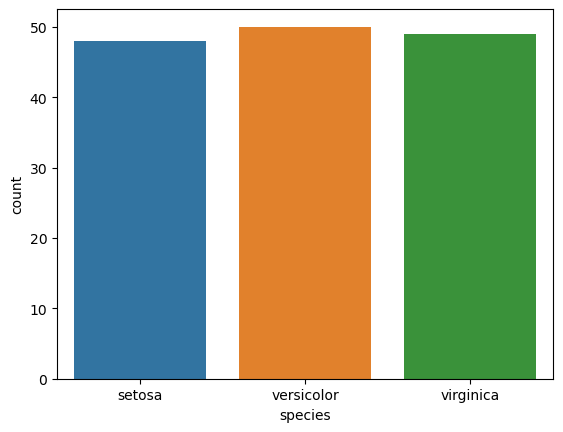

In [117]:
# Check for balance in the target variable
sns.countplot(x ='species', hue = "species", data = iris_df)

# Save the plot as a .png file
#plt.savefig('species_count.png')

The sns.countplot() function returns a graph displaying the frequency of values in a categorical variable ([seaborn](https://seaborn.pydata.org/generated/seaborn.countplot.html)). The plt.savefig() function saves a figure as the specified file format ([matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html)). I decided to include the countplot to create a visual representation of the species frequency after removal of the duplicated rows. The output shows that the removal of the duplicated rows has introduced only a slight imbalance. I decided to retain this version of the dataset as it has been noted that the machine learning algorithms that I will be conducting later are robust enough to deal with minor imbalances ([Ganganwar, 2012](https://www.researchgate.net/publication/292018027_An_overview_of_classification_algorithms_for_imbalanced_datasets)).

In [118]:
# Generate descriptive statistics summary of dataset
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The describe() function generates descriptive statistics of the imported dataset ([pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)). I decided to generate a descriptive statitics summary to briefly observe the distribution of the dataset features. The output shows that the count of each feature has now changed after dropping the duplicated rows. Additionally, sepal width has the least variability, whilst petal length has the highest variability based on the std. 

In [119]:
# Save summary as .txt file
with open('iris_summary.txt', 'w') as file:
    file.write(iris_df.describe().to_string())

To save the summary to a .txt file I followed advice from ([python help](https://www.pythonhelp.org/questions/how-to-get-python-output-in-text-file/)). Additonally, the .to_string() function was utilized as it converts the specified output to a plain text string, improving its readability ([pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_string.html)). 

### Univariate Analysis

In [ ]:
# Create histograms for each feature






In [121]:
# Create boxplot & map each feature


### Feature Distribution by Species

In [122]:
# Violin plots

### Bivariate Analysis

### Correlation Analysis

### Multidimensional Data Exploration

### Baseline Modeling

### Conclusion of Findings